#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

In [ ]:
!pip install pandas
!pip install matplotlib

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco


# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

Task1 : Basic Data Exploration :  Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [23]:
print("Attributes : ")
print(df.columns, "\n")

#Identifying the number of rows and columns in the dataset
print("Rows : " + str(df.shape[0]) + ",  Columns : " + str(df.shape[1]), "\n")
#using the shape parameter which is a list of 2 elements [rows, columns]

#Determining the datatypes of each column
print("Data types : ")
print(df.dtypes, "\n")
#dtypes is a parameter which shows the data types of all columns

#Checking for the missing values
print(df.isna().sum())

Attributes : 
Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency'],
      dtype='object') 

Rows : 148654,  Columns : 12 

Data types : 
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
dtype: object 

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
dtype: int64


Task2 : Descriptive Statistics:
Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [24]:
print("The Total Describtion : ")
print(df['TotalPay'].describe(), "\n ************************")
#This is the direct method of checking most of the requirments

print("Mean of the Salary: " + str(df['TotalPay'].mean()))
print("Median of the Salary : " + str(df['TotalPay'].median()))
print("Mode of the Salary : " + str(df['TotalPay'].mode()[0]))
print("Minimum Salary : " + str(df['TotalPay'].min()))
print("Maximum Salary : " + str(df['TotalPay'].max()))
print("Range of the Salary : " + str(df['TotalPay'].max() - df['TotalPay'].min()))
print("Standard Deviation of the Salary : " + str(df['TotalPay'].std()))

The Total Describtion : 
count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64 
 ************************
Mean of the Salary: 74768.32197169267
Median of the Salary : 71426.60999999999
Mode of the Salary : 0.0
Minimum Salary : -618.13
Maximum Salary : 567595.43
Range of the Salary : 568213.56
Standard Deviation of the Salary : 50517.00527394987


Task3 :Data Cleaning: Handle missing data by suitable method with explain why you use it.

In [25]:
#Firstly for BasePay, it should represent the salary for the an employee
#A reasonable way to fill the missing value is median because it's less
#sensitive than the mean.
median_basepay = df['BasePay'].median()
df['BasePay'] = df['BasePay'].fillna(median_basepay)

#There are sometimes no overtime pay, and it's reasonable for someone who has no overtime not to fill this value.
df['OvertimePay'] = df['OvertimePay'].fillna(0)

#There are sometimes no other pay, and it's reasonable for someone who has no other pay not to fill this value.
df['OtherPay'] = df['OtherPay'].fillna(0)

#There are sometimes no benifits pay, and it's reasonable for someone who has no other pay not to fill this value.
df['Benefits'] = df['Benefits'].fillna(0)

#No need to fill the Notes NaNs because its nature is to be empty.

#Checking for the missing values
print(df.isna().sum())

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
dtype: int64


Task4 : Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

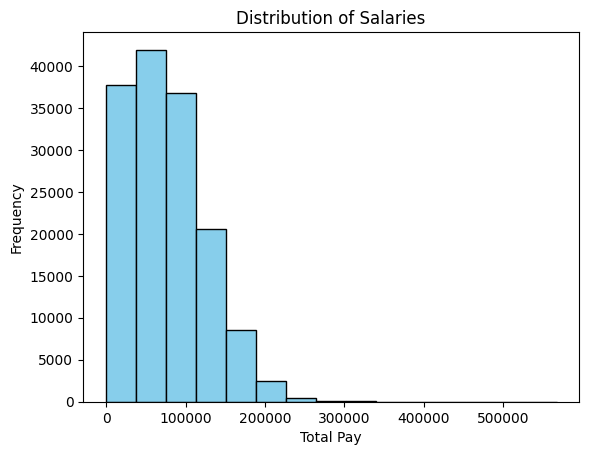

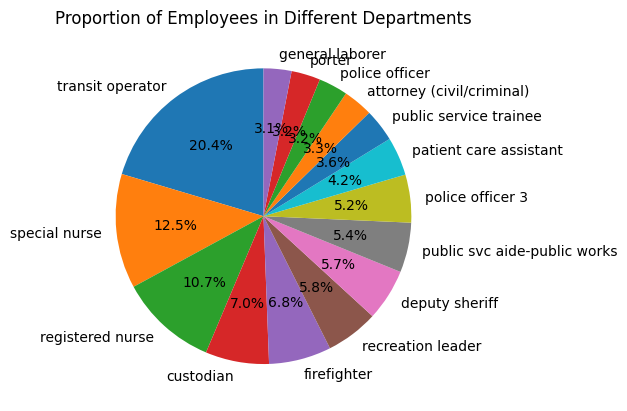

In [26]:
#A clear histogram for the distribution of salaries with black edges.
#Renaming Title, xlabel and ylabel is necessary for clarity
plt.hist(df['TotalPay'], bins = 15, color='skyblue', edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

#For more acurate result we try to minimize categories
df['JobTitle'] = df['JobTitle'].str.lower()

#Getting only the first few deparmetments of the most frequent as they are too much.
department_counts = df['JobTitle'].value_counts().head(15)
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Departments')
plt.show()

Task5 : Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [27]:
#Using grouping and aggregation at first to get the summary statistics for each group.
print("Summury Statistics For Each Group : ")
print(df.groupby(['JobTitle'])['TotalPay'].agg(['median', 'std', 'min', 'max', 'count']), '\n')

#Then using mean alone to see average in clarity.
print("Average Salary For Each Group : ")
print(df.groupby(['JobTitle'])['TotalPay'].mean())

Summury Statistics For Each Group : 
                                                   median           std  \
JobTitle                                                                  
account clerk                                   50401.800  17090.350131   
accountant                                      60076.240  27137.331315   
accountant i                                    67403.330  17287.340334   
accountant ii                                   69386.660  13312.000618   
accountant iii                                  89570.445  23223.055629   
...                                                   ...           ...   
worker's compensation supervisor i              92344.780   3839.052403   
x-ray laboratory aide                           60176.955  23267.239274   
youth comm advisor                              44449.895  17311.066571   
youth commission advisor, board of supervisors  53632.870           NaN   
zoo curator                                     66686.560      

Task6 : Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.


Correlation between TotalPay and BasePay: 0.9506887197970231


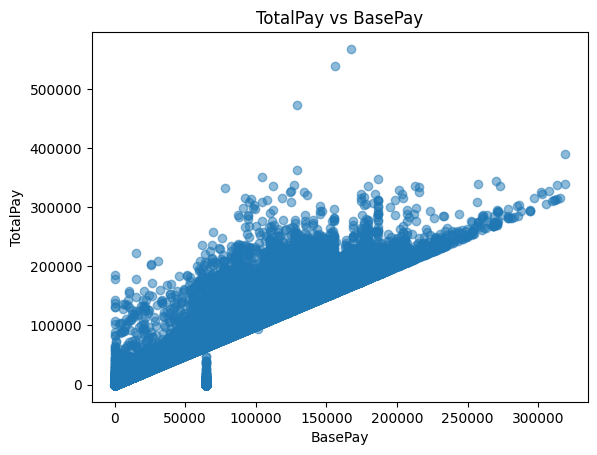

In [28]:
#Identifying the correlation between the totalpay and the basepay as the totalpay
#depends mainly on the basepay
correlation = df['TotalPay'].corr(df['BasePay'])
print("\nCorrelation between TotalPay and BasePay:", correlation)

#Creating the scatter plot between the basepay and the totalpay
plt.scatter(df['BasePay'], df['TotalPay'], alpha=0.5)
plt.title('TotalPay vs BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()

From the histogram most of the employee are recieving salary less than 100k! and the most frequent given salary is 55k!

The most frequent job from the pie chart is transit operator, which means there is a lot of dependence on the vehicles and fuel.

From the summary statistics of grouping the data frame by jobtitles, we find all the job titles by their promotions, and the higher is promotion, the higher is the salary.

Finally we see in the scatter plot that the main controller of the Total pay is the Base Pay meaning that it is not popular to have much overtime pay and other pay or benefits.

# Good Luck!